Dataset Information:
#BBC articles fulltext and category
Source: https://www.kaggle.com/datasets/yufengdev/bbc-fulltext-and-category

In [ ]:
import pandas as pd
df = pd.read_csv('/content/bbc-text.csv')

In [ ]:
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [ ]:
category = pd.get_dummies(df.category)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='category')
df_new 

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [ ]:
Text = df_new['text'].values
label = df_new[['sport', 'business', 'politics', 'tech', 'entertainment']].values

In [ ]:
from sklearn.model_selection import train_test_split
Text_latih, Text_test, label_latih, label_test = train_test_split(Text, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(Text_latih) 
tokenizer.fit_on_texts(Text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(Text_latih)
sekuens_test = tokenizer.texts_to_sequences(Text_test)
 
padded_latih = pad_sequences(sekuens_latih,
padding='post',
maxlen=200,
truncating='post')
padded_test = pad_sequences(sekuens_test,
padding='post',
maxlen=200,
truncating='post')

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
56/56 - 11s - loss: 1.5297 - accuracy: 0.3067 - val_loss: 1.2194 - val_accuracy: 0.4360 - 11s/epoch - 199ms/step
Epoch 2/30
56/56 - 11s - loss: 1.1775 - accuracy: 0.4107 - val_loss: 1.0738 - val_accuracy: 0.4404 - 11s/epoch - 202ms/step
Epoch 3/30
56/56 - 8s - loss: 1.1679 - accuracy: 0.4146 - val_loss: 1.0967 - val_accuracy: 0.4697 - 8s/epoch - 141ms/step
Epoch 4/30
56/56 - 6s - loss: 0.9664 - accuracy: 0.5315 - val_loss: 0.8116 - val_accuracy: 0.6090 - 6s/epoch - 106ms/step
Epoch 5/30
56/56 - 7s - loss: 0.6838 - accuracy: 0.6657 - val_loss: 0.8101 - val_accuracy: 0.6067 - 7s/epoch - 121ms/step
Epoch 6/30
56/56 - 6s - loss: 0.4894 - accuracy: 0.7843 - val_loss: 0.6961 - val_accuracy: 0.7213 - 6s/epoch - 105ms/step
Epoch 7/30
56/56 - 7s - loss: 0.3058 - accuracy: 0.8910 - val_loss: 0.6100 - val_accuracy: 0.7910 - 7s/epoch - 121ms/step
Epoch 8/30

Akurasi telah mencapai >90%!
56/56 - 6s - loss: 0.1757 - accuracy: 0.9494 - val_loss: 0.6708 - val_accuracy: 0.8045 - 6s/epoch - 1

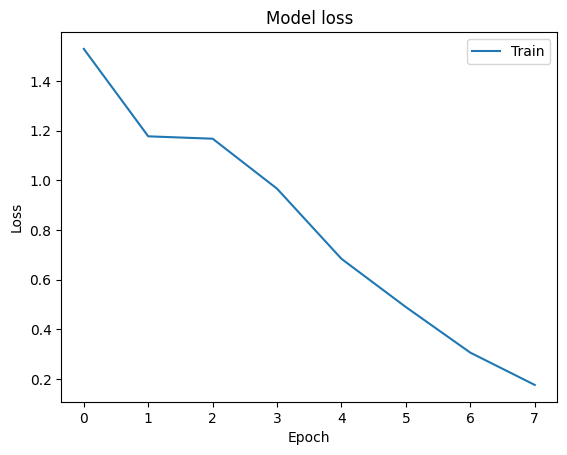

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

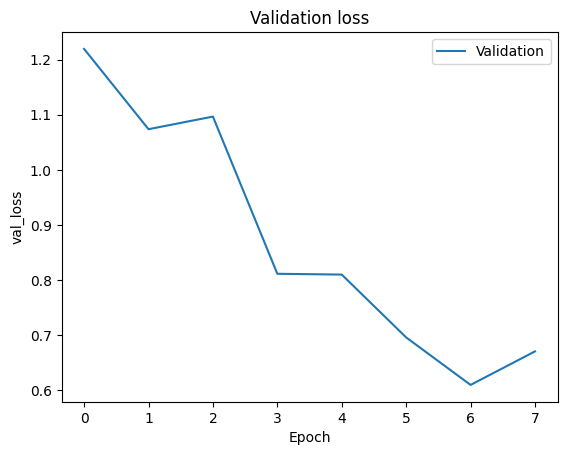

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('val_loss')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper right')
plt.show()

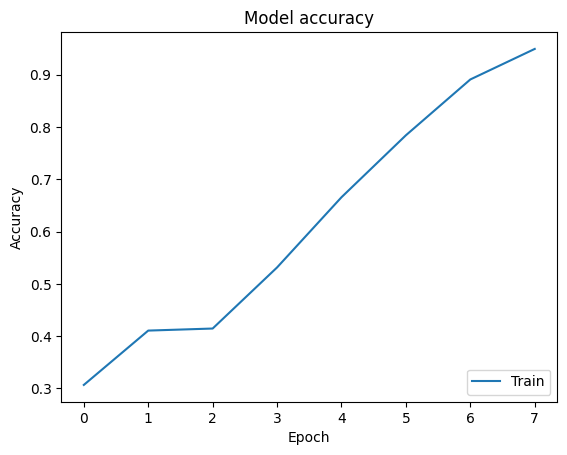

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

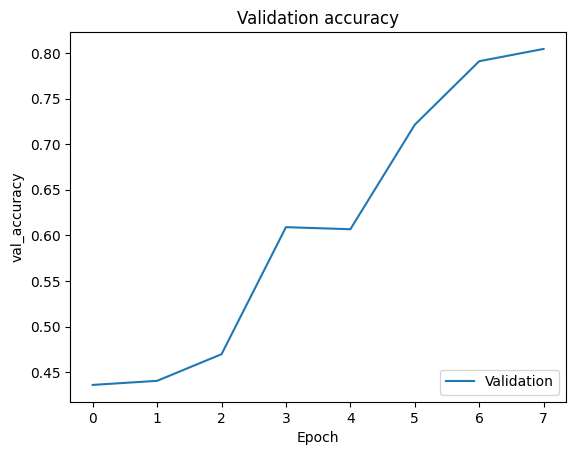

In [24]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='lower right')
plt.show()